In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [3]:
data = pd.read_excel("t.xlsx")

In [4]:
data.head()

,Dates,Indices,returns
0,2022-03-15,39.559853,8.573796
1,2022-03-14,30.986057,-8.645838
2,2022-03-11,39.631895,-6.593403
3,2022-03-10,46.225298,-1.424774
4,2022-03-09,47.650071,9.132362


In [5]:
print(data["Dates"])

0      2022-03-15
1      2022-03-14
2      2022-03-11
3      2022-03-10
4      2022-03-09
          ...    
1038   2018-01-05
1039   2018-01-04
1040   2018-01-03
1041   2018-01-02
1042   2018-01-01
Name: Dates, Length: 1043, dtype: datetime64[ns]


In [5]:
print(data["Indices"])

0        39.559853
1        30.986057
2        39.631895
3        46.225298
4        47.650071
           ...    
1038    100.877969
1039    101.662807
1040    147.652136
1041    125.269865
1042    135.541932
Name: Indices, Length: 1043, dtype: float64


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043 entries, 0 to 1042
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Dates    1043 non-null   datetime64[ns]
 1   Indices  1043 non-null   float64       
 2   returns  1042 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 24.6 KB


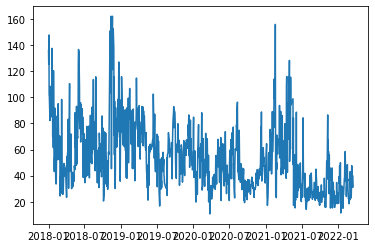

In [13]:
graph = plt.plot(data["Dates"],data["Indices"])

In [8]:
x= data["Indices"]
print(x)

0        39.559853
1        30.986057
2        39.631895
3        46.225298
4        47.650071
           ...    
1038    100.877969
1039    101.662807
1040    147.652136
1041    125.269865
1042    135.541932
Name: Indices, Length: 1043, dtype: float64


In [6]:
#Reject ho when= p<0.05
#H0 : Time series is non-stationary (has a unit root)
#H1 : Time series is stationary (has not a unit root)

X = data["Indices"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -4.570226
p-value: 0.000147
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568
Reject Ho - Time Series is Stationary


In [10]:
X = data["Indices"].values
result = adfuller(X)
print(result)
print(type(result))

(-4.570225987099581, 0.00014651423187276354, 7, 1035, {'1%': -3.4366839058058387, '5%': -2.8643365489845647, '10%': -2.5682589990431515}, 8683.092477807542)
<class 'tuple'>


### MODEL

In [23]:
pip install pmdarima

In [21]:
pip install arch

Note: you may need to restart the kernel to use updated packages.


In [24]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
import datetime as dt
import warnings
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error 
import pmdarima

In [23]:
from pmdarima import auto_arima
warnings.filterwarnings("ignore")

In [24]:
data = pd.read_excel("t.xlsx")

In [25]:
stepwise_fit = auto_arima(data["Indices"], trace=True, suppress_warnings=True )
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=4.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9112.024, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8965.955, Time=0.47 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8883.571, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9110.049, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8863.764, Time=0.76 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8858.847, Time=1.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=8927.566, Time=0.66 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=8858.023, Time=1.96 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=8896.884, Time=0.71 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=4.24 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=8860.146, Time=2.88 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=8884.460, Time=1.03 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=8849.701, Time=4.56 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=i

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1043
Model:               SARIMAX(4, 1, 2)   Log Likelihood               -4417.468
Date:                Wed, 24 Aug 2022   AIC                           8848.935
Time:                        02:03:54   BIC                           8883.577
Sample:                             0   HQIC                          8862.075
                               - 1043                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0036      0.142      7.058      0.000       0.725       1.282
ar.L2         -0.1001      0.071     -1.418      0.156      -0.238       0.038
ar.L3         -0.0419      0.040     -1.045      0.296      -0.121       0.037
ar.L4          0.0526      0.034      1.557      0.119      -0.014       0.119
ma.L1         -1.5368      0.142    -10.861      0.000      -1.814      -1.259
ma.L2          0.5416      0.139      3.895      0.000       0.269       0.814
sigma2       281.5472      8.476     33.219      0.000     264.935     298.159
===================================================================================
Ljung-Box (Q):                       32.64   Jarque-Bera (JB):               385.87
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               1.98   Skew:                             0.78
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
train = data.iloc[:-30]
test = data.iloc[-30:] #last 30 values

In [25]:
model = ARIMA(train["Indices"], order=(2,1,2))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.Indices   No. Observations:                 1012
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -4266.986
Method:                       css-mle   S.D. of innovations             16.369
Date:                Fri, 26 Aug 2022   AIC                           8545.973
Time:                        00:53:31   BIC                           8575.491
Sample:                             1   HQIC                          8557.185
                                                                              
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0364      0.009      3.865      0.000       0.018       0.055
ar.L1.D.Indices     1.1327      0.129      8.759      0.000       0.879       1.386
ar.L2.D.Indices    -0.1942      0.101     -1.914      0.056      -0.393       0.005
ma.L1.D.Indices    -1.6606      0.118    -14.124      0.000      -1.891      -1.430
ma.L2.D.Indices     0.6606      0.117      5.623      0.000       0.430       0.891
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0844           +0.0000j            1.0844            0.0000
AR.2            4.7485           +0.0000j            4.7485            0.0000
MA.1            1.0001           +0.0000j            1.0001            0.0000
MA.2            1.5136           +0.0000j            1.5136            0.0000
-----------------------------------------------------------------------------
"""

In [50]:
train=data[:900]
test=data[900:]

## pdq

In [22]:
import itertools
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import itertools
import numpy as np


In [3]:
p=range(0,8)
q=range(0,8)
d=range(0,2)

In [4]:
pdq_combination = list(itertools.product(p,d,q))

In [5]:
pdq_combination

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 0, 7),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 0, 5),
 (1, 0, 6),
 (1, 0, 7),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 1, 6),
 (1, 1, 7),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 0, 5),
 (2, 0, 6),
 (2, 0, 7),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 1, 5),
 (2, 1, 6),
 (2, 1, 7),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 0, 5),
 (3, 0, 6),
 (3, 0, 7),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (3, 1, 5),
 (3, 1, 6),
 (3, 1, 7),
 (4, 0, 0),
 (4, 0, 1),
 (4, 0, 2),
 (4, 0, 3),
 (4, 0, 4),
 (4, 0, 5),
 (4, 0, 6),
 (4, 0, 7),
 (4, 1, 0),
 (4, 1, 1),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 4),
 (4, 1, 5),
 (4, 1, 6),
 (4, 1, 7),
 (5, 0, 0),
 (5, 0, 1),
 (5, 0, 2),
 (5,

In [35]:
len(pdq_combination)

128

In [27]:
model.predict()

2        3.037933
3       -1.928237
4       -3.599661
5       -3.932422
6        2.004201
          ...    
1008   -13.412294
1009   -16.052957
1010     7.016012
1011     0.651924
1012    -9.128924
Length: 1011, dtype: float64

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.Indices   No. Observations:                 1012
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -4266.986
Method:                       css-mle   S.D. of innovations             16.369
Date:                Fri, 05 Aug 2022   AIC                           8545.973
Time:                        15:34:00   BIC                           8575.491
Sample:                             1   HQIC                          8557.185
                                                                              
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0364      0.009      3.865      0.000       0.018       0.055
ar.L1.D.Indices     1.1327      0.129      8.759      0.000       0.879       1.386
ar.L2.D.Indices    -0.1942      0.101     -1.914      0.056      -0.393       0.005
ma.L1.D.Indices    -1.6606      0.118    -14.124      0.000      -1.891      -1.430
ma.L2.D.Indices     0.6606      0.117      5.623      0.000       0.430       0.891
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0844           +0.0000j            1.0844            0.0000
AR.2            4.7485           +0.0000j            4.7485            0.0000
MA.1            1.0001           +0.0000j            1.0001            0.0000
MA.2            1.5136           +0.0000j            1.5136            0.0000
-----------------------------------------------------------------------------
"""

moel